## 0. 课程大纲

### 0.1 直方图比较
```python
cv.compareHist(hist1, hist2, method)

cv.HISTCMP_CORREL, cv.HISTCMP_CHISQR
```

### 0.2 直方图均衡化
```python
cv.equalizeHist(img)
```

### 0.3 反向投影
```python
cv.calcBackProject([img], [c], hist, [ranges], scale)
```

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 12. 直方图

### 12.1 直方图比较

In [8]:
paths = ['pic/petal200x300.jpg', 'pic/petal500x500.jpg', 'pic/parrot500x450.jpg']
imgs = [cv.imread(p) for p in paths]

hists = [cv.calcHist(im, [0], None, [256], [0, 256]) for im in imgs]

for method in range(6):
    d01 = cv.compareHist(hists[0], hists[1], method)
    d02 = cv.compareHist(hists[0], hists[2], method)  
    print('Method = %d , d01 = %9.2f, d02 = %9.2f' % (method, d01, d02))

Method = 0 , d01 =      0.89, d02 =     -0.07
Method = 1 , d01 =   1081.95, d02 =   1239.08
Method = 2 , d01 =    815.00, d02 =    275.00
Method = 3 , d01 =      0.21, d02 =      0.81
Method = 4 , d01 =    630.06, d02 =   3114.18
Method = 5 , d01 =   -237.94, d02 =  10207.99


In [11]:
paths = ['pic/petal200x300.jpg', 'pic/petal500x500.jpg', 'pic/parrot500x450.jpg']
imgs = [cv.imread(p) for p in paths]

hists = [cv.calcHist(im, [0], None, [256], [0, 256]) for im in imgs]
hists = [h / h.sum() for h in hists]

for method in range(6):
    d01 = cv.compareHist(hists[0], hists[1], method)
    d02 = cv.compareHist(hists[0], hists[2], method)  
    print('Method = %d , d01 = %5.2f, d02 = %5.2f' % (method, d01, d02))

Method = 0 , d01 =  0.89, d02 = -0.07
Method = 1 , d01 =  0.28, d02 =  0.98
Method = 2 , d01 =  0.78, d02 =  0.23
Method = 3 , d01 =  0.21, d02 =  0.81
Method = 4 , d01 =  0.30, d02 =  2.79
Method = 5 , d01 =  0.22, d02 =  8.71


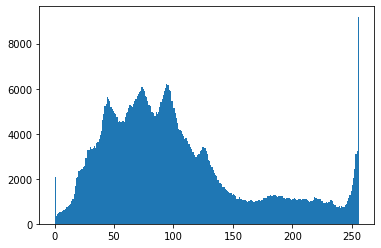

In [14]:
plt.hist(imgs[2].ravel(), 256, [0, 256])
plt.show()

In [5]:
cv.imwrite('pic/hist_cmp.jpg', np.hstack(imgs))

True

## 12.2 直方图均衡化

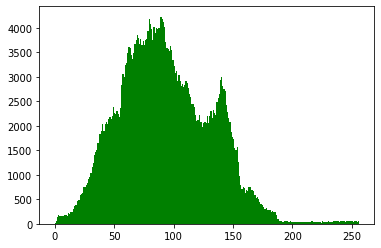

In [68]:
img = cv.imread('pic/wolf500x750.jpg', 0)

plt.hist(img.flatten(), 256, [0, 256], color='g')
plt.show()

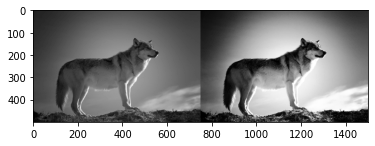

In [64]:
img_equ = cv.equalizeHist(img)
show(np.hstack([img, img_equ]))

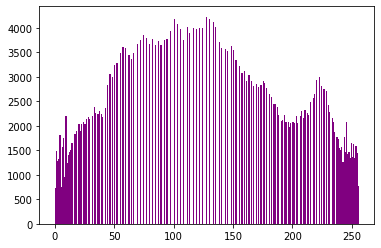

In [70]:
plt.hist(img_equ.flatten(), 256, [0, 256], color='purple')
plt.show()

In [71]:
cv.imwrite('pic/wolf_equalizehist.jpg', np.hstack([img, img_equ]))

True

In [ ]:
img = cv.imread('pic/wolf500x750.jpg', 0)
L = 256

h = cv.calcHist([img], [0], None, [256], [0, 256])
f = h / h.sum()
a = np.cumsum(f)
s = np.round(freq * (L-1)).astype(np.uint8)

equ = s[img]

show(equ)

### 12.3 反向投影

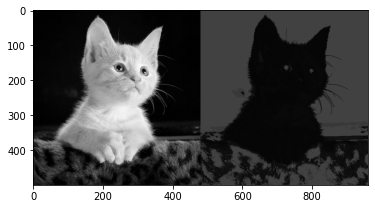

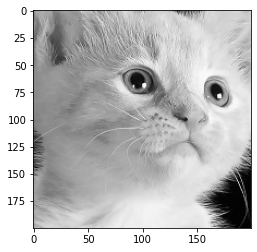

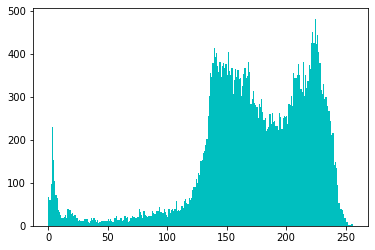

In [25]:
## 灰度图

whole = cv.imread("pic/cat500x480.jpg", 0)
part = whole[100:300, 150:350]

hist = cv.calcHist([part], [0], None, [64], [0, 256])
cv.normalize(hist, hist, 0, 255, cv.NORM_MINMAX)

bp = cv.calcBackProject([whole], [0], hist, [0, 256], 1)
show(np.hstack([whole, bp]))
show(part)

plt.hist(part.ravel(), 256, [0, 256], color='c')
plt.show()

In [48]:
cv.imwrite('pic/cat_histbackproj.jpg', np.hstack([whole, bp]))
cv.imwrite('pic/cat_head.jpg', part)

True

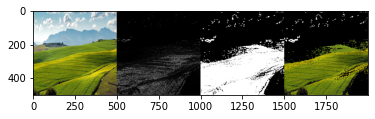

In [7]:
## 彩色图

whole = cv.imread("pic/grass500x500.jpg")
part  = whole[400:500, 100:200, :]

whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv = cv.cvtColor(part, cv.COLOR_BGR2HSV)

part_hist = cv.calcHist([part_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# print(shore_hist.max())
# 把频次转换到0-255之间
cv.normalize(part_hist, part_hist, 0, 255, cv.NORM_MINMAX)
dst = cv.calcBackProject([whole_hsv], [0,1], part_hist, [0, 180, 0, 256], 1) # scale把dst整体乘scale再截断

dst3 = cv.merge([dst, dst, dst])
# 卷积
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
dst = cv.filter2D(dst, -1, disc)

_, thresh = cv.threshold(dst, 100, 255, 0)
thresh = cv.merge((thresh, thresh, thresh))
res = cv.bitwise_and(whole, thresh)

show(np.hstack([whole, dst3, thresh, res]))

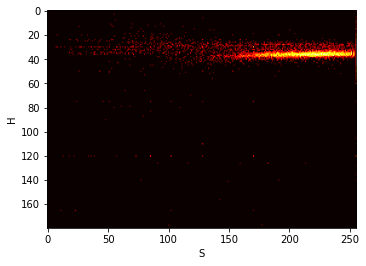

In [20]:
plt.imshow(np.log(1 + part_hist).clip(0, 3), cmap='hot')
plt.xlabel('S')
plt.ylabel('H')
plt.show()

In [17]:
np.log(1 + part_hist).med

0.038935915

In [60]:
cv.imwrite('pic/grass_histbackproj.jpg', np.hstack([whole, dst3, thresh, res]))
cv.imwrite('pic/grass_part.jpg', part)

True

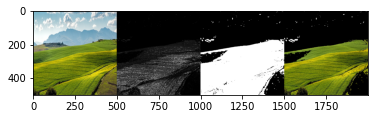

In [71]:
## 彩色图

whole = cv.imread("pic/grass500x500.jpg")
part  = whole[400:500, 100:200, :]

whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv = cv.cvtColor(part, cv.COLOR_BGR2HSV)

part_hist = cv.calcHist([part_hsv], [0, 1], None, [45, 64], [0, 180, 0, 256])

# print(shore_hist.max())
# 把频次转换到0-255之间
cv.normalize(part_hist, part_hist, 0, 255, cv.NORM_MINMAX)
dst = cv.calcBackProject([whole_hsv], [0,1], part_hist, [0, 180, 0, 256], 1)

dst3 = cv.merge([dst, dst, dst])
# 卷积
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
dst = cv.filter2D(dst, -1, disc)

_, thresh = cv.threshold(dst, 100, 255, 0)
thresh = cv.merge((thresh, thresh, thresh))
res = cv.bitwise_and(whole, thresh)

show(np.hstack([whole, dst3, thresh, res]))

In [68]:
cv.imwrite('pic/grass_histbackproj2.jpg', np.hstack([whole, dst3, thresh, res]))

True

In [ ]:
whole = cv.imread("pic/cat500x480.jpg", 0)
part = whole[100:300, 150:350]

gamma = 4
hist = cv.calcHist([part], [0], None, [256//gamma], [0, 256])
cv.normalize(hist, hist, 0, 255, cv.NORM_MINMAX)

bp = cv.calcBackProject([whole], [0], hist, [0, 256], 1)
show(np.hstack([whole, bp]))

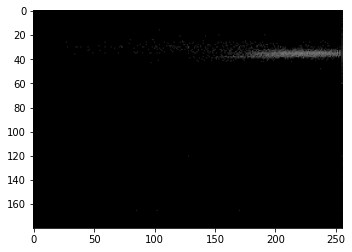

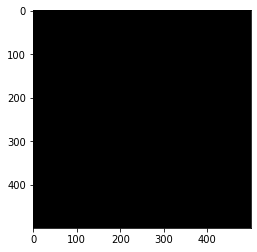

In [45]:
whole = cv.imread('pic/grass500x500.jpg')
whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv  = whole_hsv[400:500, :100]
part_hist = cv.calcHist([part_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
part_hist = cv.normalize(part_hist, None, 0, 255, cv.NORM_MINMAX).astype(np.int)
show(np.log(1+part_hist))

back_prj  = cv.calcBackProject([whole_hsv], [0, 1], part_hist, [0, 180, 0, 256], 1)

show(back_prj)

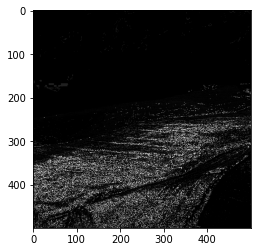

In [46]:
show(part_hist[whole_hsv[:,:,0], whole_hsv[:,:,1]])